<a href="https://colab.research.google.com/github/angadsingh24/stock_sentiment_analysis/blob/main/stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk

In [ ]:
!pip install gensim

In [ ]:
stock_df = pd.read_csv('/content/drive/MyDrive/stock_sentiment_analysis/Copy of stock_sentiment.csv')
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

#DATA CLEANING

REMOVE PUNCTUATION

In [ ]:
import string

In [ ]:
def remove_punc(message):
  punc_removed = [char for char in message if char not in string.punctuation]
  punc_removed = ''.join(punc_removed)
  return punc_removed

In [ ]:
stock_df['Text without punc'] = stock_df['Text'].apply(remove_punc)
stock_df

,Text,Sentiment,Text without punc
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


REMOVE STOPWORDS

In [ ]:
# download stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])

In [ ]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in stop_words and len(token) >= 3:
      result.append(token)
  return result

In [ ]:
stock_df['Text without punc and stopwords'] = stock_df['Text without punc'].apply(preprocess)
stock_df

,Text,Sentiment,Text without punc,Text without punc and stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


# PLOT WORDCLOUD

In [ ]:
stock_df['Text without punc and stopwords joined'] = stock_df['Text without punc and stopwords'].apply(lambda x: ' '.join(x))
stock_df

,Text,Sentiment,Text without punc,Text without punc and stopwords,Text without punc and stopwords joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


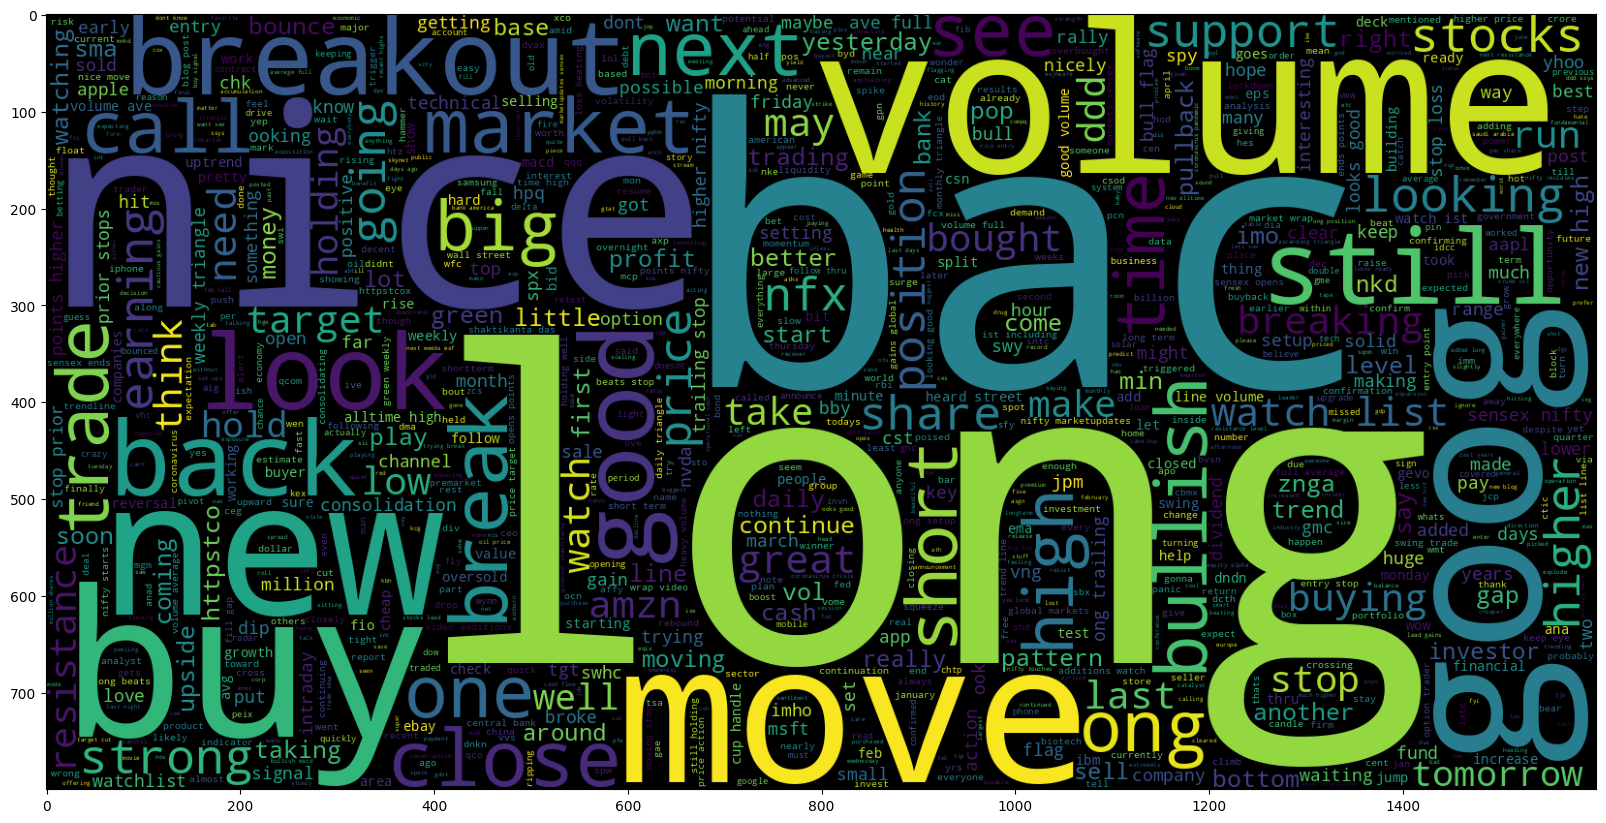

In [ ]:
#Postive sentiment
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(' '.join(stock_df[stock_df['Sentiment'] == 1]['Text without punc and stopwords joined']))
plt.imshow(wc)

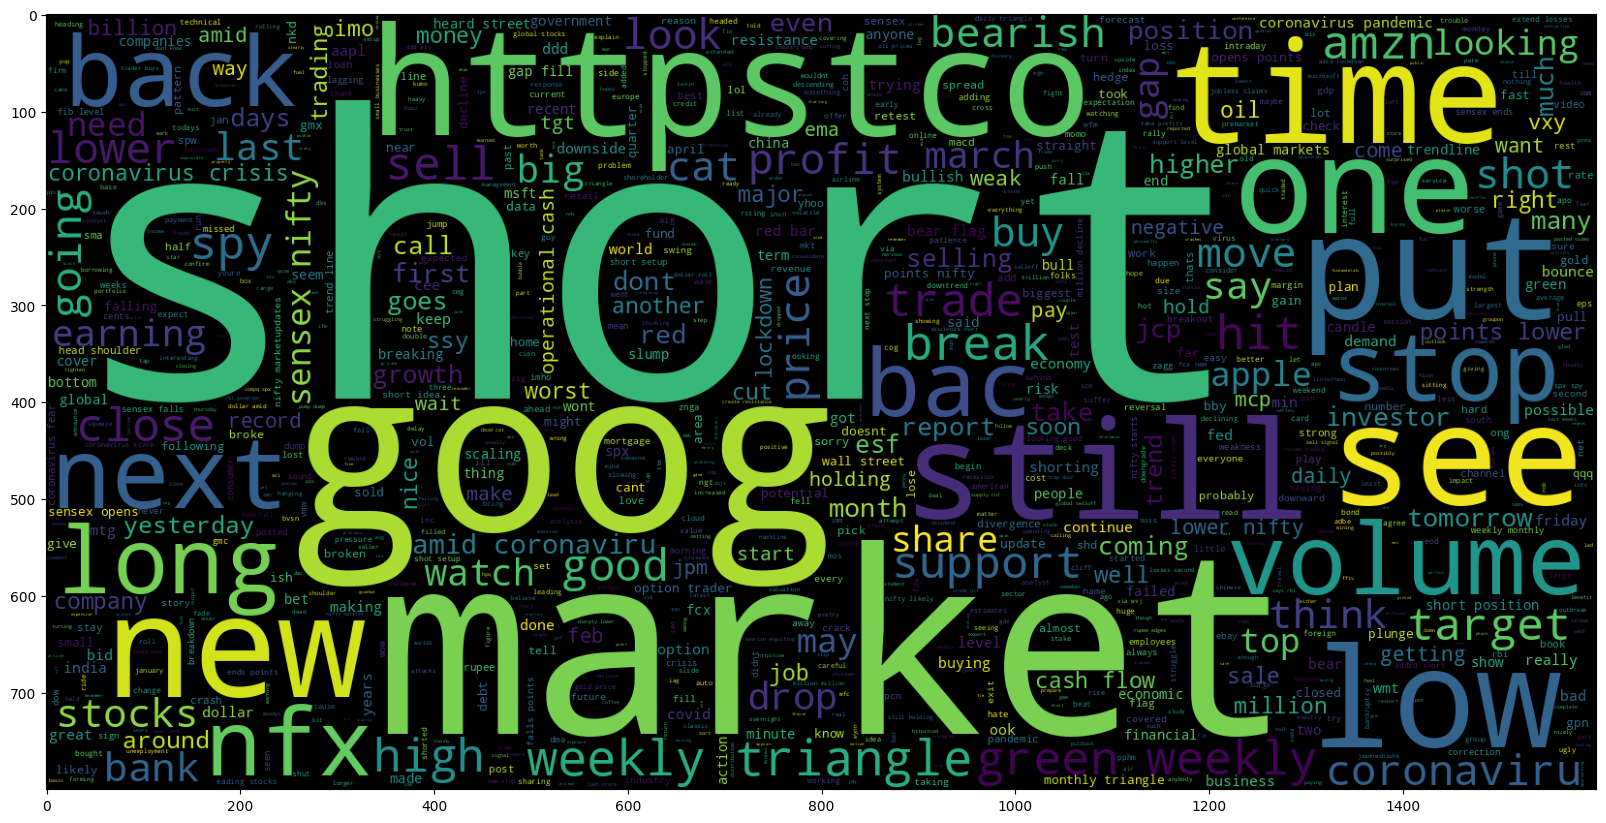

In [ ]:
#Negative sentiment
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(' '.join(stock_df[stock_df['Sentiment'] == 0]['Text without punc and stopwords joined']))
plt.imshow(wc)

#VISUALIZE CLEANED DATASET

In [ ]:
stock_df['Text without punc and stopwords joined'][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

In [ ]:
nltk.download('punkt')
nltk.word_tokenize(stock_df['Text without punc and stopwords joined'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [ ]:
maxlen = -1
for doc in stock_df['Text without punc and stopwords joined']:
  tokens = nltk.word_tokenize(doc)
  if len(tokens) > maxlen:
    maxlen = len(tokens)
maxlen


20

In [ ]:
stock_df['Text without punc and stopwords joined'][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

In [ ]:
tweets_len = [len(nltk.word_tokenize(x)) for x in stock_df['Text without punc and stopwords joined'] ]
tweets_len

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [ ]:
fig = px.histogram(x=tweets_len, nbins=50)
fig.show()

#PREPARE DATA

In [ ]:
list_of_words = []

for i in stock_df['Text without punc and stopwords joined']:
    for j in i.split():
      list_of_words.append(j)


In [ ]:
#All unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [ ]:
X = stock_df['Text without punc and stopwords joined']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
#Tokenizer
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)


In [ ]:
#Training data
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences

[[40, 1293, 3622],
 [302, 1107, 3623, 1897, 137, 18, 604, 558],
 [20, 559, 1546, 37, 159, 1898, 513],
 [275, 2467, 460, 231, 144, 14, 182, 40, 3624, 1899, 2468, 127, 2469],
 [21, 560, 193, 514, 9, 417, 342, 232, 3625, 3626, 1900, 3627],
 [256, 10, 69, 160, 765, 3628, 148, 11, 461],
 [486, 700, 37, 161, 487, 766, 18, 106],
 [44, 3, 233, 967, 968, 28, 435, 144, 144],
 [8, 1, 389, 81, 864, 276, 3629, 193],
 [317, 561, 767, 22, 3630, 215],
 [101, 1547],
 [264, 318, 3631, 3632, 865, 364, 55, 14, 17, 319, 153, 3633],
 [3634, 3635, 3636, 2470, 145, 768, 4, 562, 1548, 3637],
 [769, 701, 3638, 3639, 18, 234, 62, 3, 19, 2, 182],
 [21, 257, 1549, 41, 111, 2471, 137, 2472, 1901],
 [115, 1550, 3640, 515, 84],
 [24, 1902, 204, 516, 1294, 77, 7, 175, 418],
 [6, 517, 154, 265, 605, 3641, 3642, 488, 770, 771, 289, 1903, 277, 3643],
 [1551, 1108, 563, 94, 1552, 969, 970, 240, 2473, 1904, 3644, 3645, 3646],
 [1295, 1905, 866, 390, 250, 56, 61, 17, 153, 1906, 3647, 3648],
 [702, 96, 107, 3649, 171],
 [275

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences

[[8, 945, 375],
 [32, 3282, 647],
 [37, 81, 339, 1614, 1, 2029, 919, 13, 821, 357, 333, 2460],
 [1971, 57, 1973, 371, 8270, 1461, 15, 45, 1429, 8350, 40],
 [282, 65],
 [483, 672, 43, 170, 905, 28],
 [179, 77, 864, 224, 421, 162, 14, 1283, 207, 2648],
 [1647, 2, 1568, 14, 13, 1308, 2],
 [2101, 320, 659, 1276, 805, 35, 608, 2637, 1186],
 [122, 289, 97, 1345],
 [129, 373, 683, 5, 1181, 21, 175, 65, 254],
 [239, 1221, 583, 454, 509, 1194, 8372, 336],
 [980, 4],
 [185, 11, 379, 136, 618, 11, 1167, 82],
 [2777, 899, 1262, 766, 17, 96, 2038, 6781, 1886, 756, 1113, 1477],
 [1386, 2073, 155, 2436],
 [256, 742, 6161, 824, 4263, 32, 56],
 [8, 37, 51, 73, 1553, 15],
 [2999, 2932, 39, 129, 200, 214, 39, 1385],
 [406, 430, 265, 736, 1009, 1990, 951, 3458, 113, 1090, 513, 1268, 1596, 2978],
 [7616, 88, 22, 101, 133, 38, 829, 480, 481, 104, 1919],
 [161, 938, 255, 1807, 335, 58, 650, 1927],
 [738, 1188, 502, 1834, 312, 126, 1046, 121, 1150, 531, 1007],
 [5203, 79, 44, 5, 49, 156, 5494],
 [1592, 6209, 

In [ ]:
#Padding
padded_train = pad_sequences(train_sequences, maxlen=15)
padded_test = pad_sequences(test_sequences, maxlen=15)


In [ ]:
for i, doc in enumerate(padded_train[:3]):
  print('The padding encoding for document', i+1, 'is', doc)


The padding encoding for document 1 is [   0    0    0    0    0    0    0    0    0    0    0    0   40 1293
 3622]
The padding encoding for document 2 is [   0    0    0    0    0    0    0  302 1107 3623 1897  137   18  604
  558]
The padding encoding for document 3 is [   0    0    0    0    0    0    0    0   20  559 1546   37  159 1898
  513]


In [ ]:
y_train_cat = to_categorical(y_train,2)
y_test_cat = to_categorical(y_test,2)

#BUILD MODEL

In [ ]:
model = Sequential()
model.add(Embedding(total_words, output_dim = 512))

model.add(LSTM(256))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         4745216   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5565826 (21.23 MB)
Trainable params: 5565826 (21.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(padded_train, y_train_cat, batch_size=32, validation_split=0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 28s 213ms/step - loss: 0.0614 - acc: 0.9750 - val_loss: 1.3654 - val_acc: 0.7478
Epoch 2/2
131/131 [==============================] - 29s 222ms/step - loss: 0.0500 - acc: 0.9822 - val_loss: 1.0394 - val_acc: 0.7469


#ASSESS MODEL

In [ ]:
pred = model.predict(padded_test)

19/19 [==============================] - 1s 31ms/step


In [ ]:
prediction = []
for i in pred:
  prediction.append(np.argmax(i))


In [ ]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, prediction)
accuracy

0.7758620689655172

<Axes: >

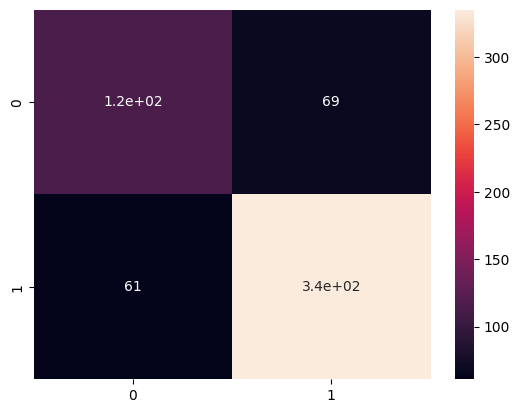

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True)